<a href="https://colab.research.google.com/github/RafaelSapia/projetos_data_science/blob/master/Panorama_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama da COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito da COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito da COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados utilizados aqui neste projeto são provenientes do [Our World in Data](https://ourworldindata.org/), uma organização que busca tornar cada vez mais presente o *data driven* no mundo, ou seja, o direcionamento de decisões por meio dos dados.

Dentro do site dessa organização existe uma [grande parte focada somente na pandemia causada pela COVID-19](https://ourworldindata.org/coronavirus) que estamos passando. Lá é possivel acompanhar, com atualizações diárias, como evolui a pandemia em todas as partes do globo.

Por meio da plataforma do [Github](https://github.com/owid/covid-19-data/tree/master/public/data) eles disponibilizam os dados atualizados sobre a COVID-19. O arquivo que será usado aqui nesta análise é encontrado no link acima e possui a extensão `csv`.

É uma base de dados muito completa como será apresentado logo abaixo, possui uma grande quantidade de paises. Ela oferece desde o número total de infectados até o dia 20/06/2020, até o PIB *per capita* de cada país presente na base de dados.

Apesar de essa ser uma base de dados boa para se trabalhar sobre este assunto, não é comum encontrarmos isso. Muitas informações compartilhadas, principalmente via *internet*, se enquadram como *fake news* e só prejudicam a caminhada para o fim dessa crise. Outro ponto é a dificuldade intrínseca de se analisar uma coisa muito nova pelo fato de termos poucas conclusões concretas sobre o assunto, como dito na introdução. 

Além disso, vale ressaltar que apesar destes dados serem atuais, pode ser que em alguma outra base de dados, principalmente aquelas associadas aos governos, estejam com dados diferentes. 

Por fim, antes de entrarmos na análise propriamente, digo de antemão que não colocarei minha opnião aqui sobre o assunto, apenas farei análises em cima dos dados e colocarei alguns insghts que se pode tirar em cima do que estesdados nos mostram.


### Dicionário de Variáveis

Para iniciar o estudo da COVID-19 farei aqui um dicionário de todas as variáveis do *dataset* para que fique claro e fácil de encontrar o que cada uma significa.

   * `ìsocode` - Abreviação do nome de cada país segundo o ISO 3166-1 alfa-3
   * `continent` - Continente que o país pertence 
   * `location` - Nome do país em questão
   * `date` - Data do momento da coleta dos dados
   * `total_cases` - Número total de casos confirmados da COVID-19
   * `new_cases` - Novos casos confirmados da COVID-19 
   * `total_deaths` - Total de mortes atribuidas à COVID-19
   * `new_deaths` - Novas mortes atribuidas à COVID-19
   * `total_cases_per_million` - Total de casos confirmados da COVID-19 por 1.000.000 de pessoas
   * `new_cases_per_million` - Novos casos confirmados da COVID-19 por 1.000.000 de pessoas
   * `total_deaths_per_million` - Total de mortes atribuidas à COVID-19 por 1.000.000 de pessoas
   * `new_deaths_per_million` - Novas mortes atribuidas à COVID-19 por 1.000.000 de pessoas
   * `total_tests` - Total de testes feitos para COVID-19
   * `new_tests` - Novos testes para COVID-19
   * `total_tests_per_thousand` - Total de casos confirmados da COVID-19 por 1.000 de pessoas
   * `new_tests_per_thousand` - Novos casos confirmados da COVID-19 por 1.000 de pessoas
   * `new_tests_smoothed` - Novos testes para COVID-19 suavidados. Para países que não reportam diariamente o número de novos testes feitos, é pego o ultimo reporte dado e é aplicado a todos os dias que não se tem os dados.
   * `new_tests_smoothed_ per_thousand` -  Novos testes para COVID-19 suavisados por 1.000 de pessoas
   * `tests_units` - Unidades usadas por localização para reportar os dados de teste
   * `stringency_index` - Indice de Rigor baseado em 9 indicadores incluindo fechamento de escolas, de locais de trabalho e suspensão de viajens. A escala desde indicador vai de 0 a 100, sendo 100 o mais rigoroso.
   * `population` - População do país em 2020
   * `population_density` - Densidade populacional (população divido pela área total do país)
   * `median_age` - Média de idade do país
   * `aged_65_older` - Parte da população com 65 anos ou mais 
   * `aged_70_older` - Parte da população com 70 anos ou mais
   * `gdp_per_capita` - PIB per capita
   * `extreme_poverty` - Parte da população que vive sob pobreza extrema
   * `cvd_death_rate` - Taxa de mortes por doenças cardiovasculares em 2017
   * `diabetes_prevalence` - Prevalência de diabetes na população (dado em porcentagem e calculado em pessoas com idades entre 18 e 79
   * `female_smokers` - Parte da população feminina que fuma
   * `male_smokers` - Parte da população masculina que fuma
   * `handwashing_facilities` - Parte da população que possui instalações básicas para higiene das mãos
   * `hospital_beds_per_thousand` - Número de leitos hospitalares por 1000 pessoas
   * `life_expectancy` - Expectativa de vida em 2019

### Importando os dados da COVID-19 e bibliotecas que serão usadas

Para iniciar precisamos importar os pacotes que usaremos pra trabalhar os dados e instaciar em uma variável o conjunto de dados que usaremos. Tais processos estão feitos abaixo.


In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# importar o dataset COVID-19 para um DataaFrame


df = pd.read_csv("/content/owid-covid-data.csv")

## Análise Exploratória dos Dados

Começaremos agora as análises iniciais sobre o nosso *dataset*. Esta parte é essencial, pois ela servirá de base para todo o resto do estudo. 

Aqui conheceremos a cara do nosso conjunto de dados, veremos se existem valores nulos, se é necessário mudar o tipo de alguma variável, entre outras análises. 

Vale lembrar que este *dataset* contém dados até o dia 20/06/2020, portanto os dados utilizados estão atualizados até este dia. Provavelmente no momento da postagem ja haverá dados mais atualizados, visto que o site que fornece estes dados os atualizam diariamente.


### Visualizando as primeiras entradas

Veremos aqui, utilizando a função `head` as cinco primeiras entradas do *dataset* para nos familiarizarmos com ele.

In [ ]:
# vendo 5 primeiras entradas 

df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Ai estão as 5 primeiras entradas. Note que temos variáveis do tipo texto (string) e variáveis numéricas (contínuas), e também temos uma variável que contém data, é possível que para esta seja preciso uma troca de tipo caso ela esteja com o tipo string. Além disso note que temos colunas com valores nulos, nas próximas análises vamos observa-los melhor.

### Tipo das Variáveis

Como dito acima, temos variáveis de vários tipos e talvez precisaremos mudar o tipo de uma delas. Analisaremos melhor este ponto agora utilizando o método `dtypes`.

In [ ]:
# vendo tipo das variaveis

df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                           int64
population_density                 float64
median_age                         float64
aged_65_old

Como podemos observar a única variável que precisaremos mexer é `date`. Para conseguirmos trabalhar com data é necessário que a váriavel que as contém esteja com o tipo `datetime` e não como string representado acima como `object`.

Abaixo faremos a transformação utilizando a função `datetime`.

In [ ]:
# transformando a variavel date

df.date = pd.to_datetime(df.date)

### Observando o tamanho do Conjunto de Dados

Observaremos agora o tamanho do conjunto de dados, ou seja, veremos a quantidade de linhas (entradas) e a quantidade de colunas (variáveis) do *dataset*. Precisamos saber esta informação para termos uma ideia da quantidade de dados que estamos trabalhando e ter uma noção inicial sobre a confiabilidade dos resultados que obteremos.

Usaremos para observar o tamanho do *dataset* o método `shape`.

In [ ]:
# vendo tamanho do dataset

print("Quantidade de entradas (linhas): {}".format(df.shape[0]))
print("Quantidade de variáveis (colunas): {}".format(df.shape[1]))

Quantidade de entradas (linhas): 24742
Quantidade de variáveis (colunas): 34


Podemos ver que temos uma boa quantidade de entradas, portanto temos uma quantidade suficiente de dados para obter resultados confiáveis. Além disso podemos observar que temos 34 variáveis, ou seja, temos bastante informação sobre cada entrada (lembre-se de que você pode conferir melhor o que cada uma significa no dicionário de variáveis). 

### Observando nome das Colunas (variáveis)

Apesar de ja termos descrito o nome de cada variável no dicionário de variáveis e observado a sequência que elas se apresentam no *dataset*, utilizaremos aqui o método `columns` para deixar registrado o nome de todas juntas na sequência que se apresentam no conjunto de dados com o intuito de facilitar ainda mais a leitura e a análise delas.

In [ ]:
# nome das colunas

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

### Vendo valores Nulos

Valores nulos quase sempre aparecerão quando trabalhamos com dados e sempre são um problema, pois eles reduzem a precisão do estudo e dificulta a execução do mesmo. Por isso, sempre devemos observa-los com o objetivo de descobrir em quais variáveis eles estão presente e decidir o que faremos com eles.

É possível simplesmente retira-los ou completa-los com algum valor pertinente. Para essa decisão precisamos, entre outras coisas, observar a magnitude da quantidade desses valores ausentes. Faremos isso abaixo mostrando a porcentagem deles em relação ao total de valores (entradas).

In [ ]:
# porcentagem de valores nulos

(df.isnull().sum() / df.shape[0]) * 100

iso_code                            0.000000
continent                           0.699216
location                            0.000000
date                                0.000000
total_cases                         0.909385
new_cases                           0.909385
total_deaths                        0.913427
new_deaths                          0.913427
total_cases_per_million             0.909385
new_cases_per_million               0.909385
total_deaths_per_million            0.913427
new_deaths_per_million              0.913427
total_tests                        71.776736
new_tests                          74.440223
total_tests_per_thousand           71.776736
new_tests_per_thousand             74.440223
new_tests_smoothed                 69.404252
new_tests_smoothed_per_thousand    69.404252
tests_units                        66.910517
stringency_index                   18.656535
population                          0.000000
population_density                  3.698165
median_age

Podemos ver que em grande parte das variáveis existem valores nulos. Algumas com uma quantidade baixa deles e outras com uma quantidade muito alta. todas as variáveis referentes a teste possuem uma quantidade superior a 50% das entradas com valores faltantes. O restante possui uma quantidade moderada ou muito baixa desses valores. 

Por enquanto não faremos nada a respeito, pórem é de suma importância ja de início conhecer como estes valores faltantes se comportam no nosso *dataset*, pois logo precisaremos tratá-los.

## Panorama da COVID-19 no Mundo

A partir daqui faremos algumas análises e visualizações para a situação da COVID-19 no mundo todo. 

Veremos os países que estão com os maiores números de mortes e casos, tiraremos alguns insights a partir dessas informações e análisaremos alguns casos específicos.

### Observando países com Maior Número de Casos e Maior Número de Mortos

Fazendo agora uma análise mais apurada, verificaremos os cinco países com maior número de casos e com maior número de mortos até a data mais recente, 20/06/2020. Para tirarmos os próximos insights precisamos conhece-los.

In [ ]:
# verificando paises com maior numero de casos

df.loc[df['date']=='2020-06-20'].sort_values(by='total_cases', ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
23701,USA,North America,United States,2020-06-20,2220961.0,29909.0,119112.0,678.0,6709.798,90.359,359.852,2.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
3404,BRA,South America,Brazil,2020-06-20,1032913.0,54771.0,48954.0,1206.0,4859.409,257.674,230.307,5.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
18963,RUS,Europe,Russia,2020-06-20,569063.0,7972.0,7972.0,182.0,3899.442,54.627,54.627,1.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145934460,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58
10598,IND,Asia,India,2020-06-20,395048.0,14516.0,12948.0,375.0,286.266,10.519,9.383,0.272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66
23528,GBR,Europe,United Kingdom,2020-06-20,301815.0,1346.0,42461.0,173.0,4445.909,19.827,625.475,2.548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32


Podemos ver até o dia 20/06/2020 os países com maior número de casos confirmados da COVID-19 foram:
 * Estados Unidos com 2.220.961 casos
 * Brasil com 1.032.913 casos
 * Russia com 569.063 casos
 * India com 395.048
 * Reino Unido com 301.815 casos

Podemos notar que temos uma grande diferença entre o primeiro e o segundo, com uma diferença de 1.200.000 casos. Também notamos uma diferença significativa entra o segundo e o terceiro com um número prócimo de 500.000 casos.

In [ ]:
# verificando paises com maior numero de mortes

df.loc[df['date']=='2020-06-20'].sort_values(by='total_deaths', ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
23701,USA,North America,United States,2020-06-20,2220961.0,29909.0,119112.0,678.0,6709.798,90.359,359.852,2.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
3404,BRA,South America,Brazil,2020-06-20,1032913.0,54771.0,48954.0,1206.0,4859.409,257.674,230.307,5.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
23528,GBR,Europe,United Kingdom,2020-06-20,301815.0,1346.0,42461.0,173.0,4445.909,19.827,625.475,2.548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
11718,ITA,Europe,Italy,2020-06-20,238011.0,-148.0,34561.0,47.0,3936.550,-2.448,571.617,0.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60461828,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
8185,FRA,Europe,France,2020-06-20,159452.0,811.0,29617.0,14.0,2442.829,12.425,453.737,0.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65273512,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66


Podemos ver que até o dia 20/06/2020 os países com maior quantidade de mortes atribuidas à COVID-19 foram:

 * Estados Unidos com 119.112 mortes
 * Brasil com 48.954 mortes
 * Reino Unido com 42.461 mortes
 * Itália com 34.561 mortes
 * França com 29.617 mortes

Vemos que os dois países com maior número de casos confirmados também são os que possuem os maiores números de mortes. Outro país que aparece nas duas tabelas é o Reino Unido. 

Além disso notamos uma difereça significativa entre o primeiro e o segundo, com uma diferença de aproximadamente 60.000 mortes.

Dois casos no mínimo curiosos seriam o da India e da Rússia. Observe que a India aparece como o quarto país com maior número de casos confirmados, porém não aparece na lista de maiores números de mortes. O mesmo ocorre com a Rússia. Logo analisaremos estes casos mais de perto.

### Gráfico de barras para Países com Maior Número de Casos e Maior Número de Mortos

Nós conseguimos interpretar gráficos muito melhor que tabelas. Portanto, a visualização de gráfico a cerca dos resultados apresentados acima se torna essencial principalmente para conseguirmos ter uma noção da magnitude destes números apresentados.

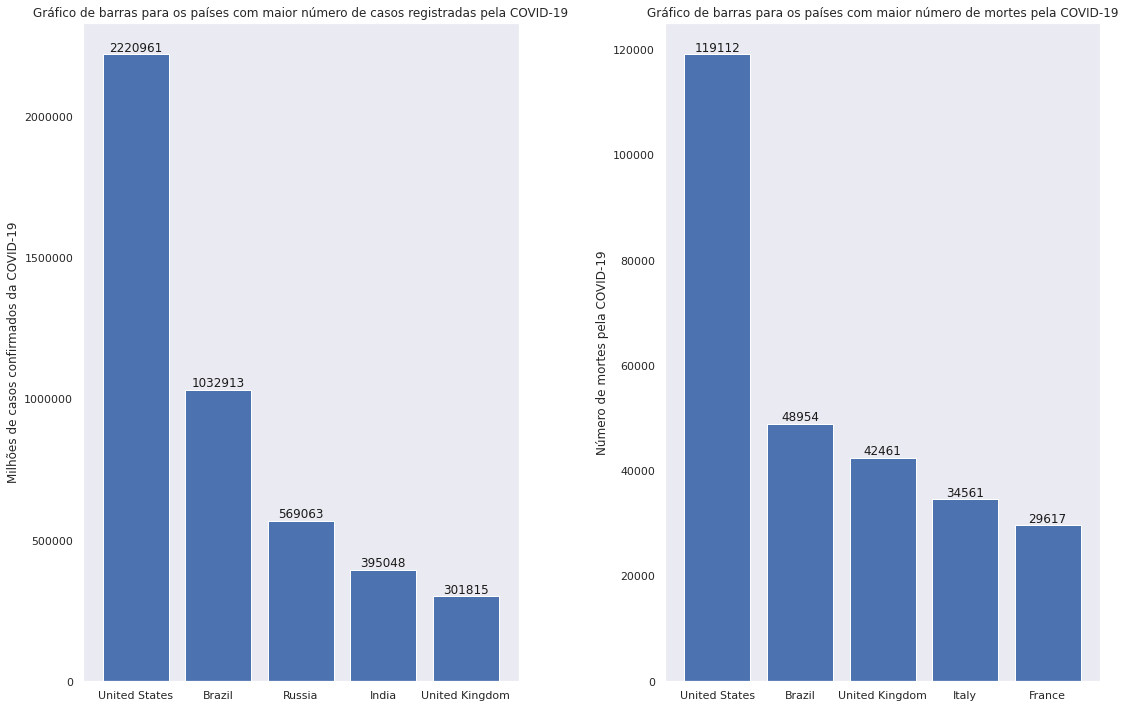

In [133]:
# gráfico de barras para os cinco paises com maior numero de casos e maior numero de mortes

df_casos = df.loc[df['date']=='2020-06-20', ['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:6].copy()
df_mortes = df.loc[df['date']=='2020-06-20', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6].copy()

sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))

ax1.bar('location', 'total_cases', data=df_casos)
ax1.set_ylabel('Milhões de casos confirmados da COVID-19')
ax1.set_title('Gráfico de barras para os países com maior número de casos registradas pela COVID-19')
ax1.set_yticklabels(['0', '500000', '1000000', '1500000', '2000000'])
ax1.grid(False)

for i in range(5):
  ax1.text(i,df_casos.iloc[i].total_cases, int(df_casos.iloc[i].total_cases),
           ha='center', va='bottom', color='k')



ax2.bar('location', 'total_deaths', data=df_mortes)
ax2.set_ylabel('Número de mortes pela COVID-19')
ax2.set_title('Gráfico de barras para os países com maior número de mortes pela COVID-19')
ax2.grid(False)

for i in range(5):
  ax2.text(i,df_mortes.iloc[i].total_deaths, int(df_mortes.iloc[i].total_deaths),
           ha='center', va='bottom', color='k')


plt.tight_layout()

Por meio do gráfico da esquerda podemos observar com maior clareza a diferença entre os 5 países com maior número de casos confirmados da COVID-19. Vemos que os Estados Unidos possui uma diferença significativa dos demais.

No gráfico à direita, mais uma vez os Estados Unidos possui uma diferença significativa dos demais, sendo seu número de mortes maior que o dobro do segundo com mais mortes, o Brasil.

### Gráfico da evolução da COVID-19 no Mundo

Todos nós ja ouvimos falar em algum lugar da curva de contágio de doenças infecciosas. Essa curva começa pouco expressiva, porém com o passar do tempo ela cresce cada vez mais rápida até atingir um topo e começar sua queda. 

Em termos mais técnicos essa curva segue uma função exponencial e sua disposição no gráfico se assemelha à disposição de uma distribuição normal.

Observaremos aqui o gráfico da evolução da COVID-19 desde o seu início. Como, em geral, no mundo essa doença ainda não foi controlada provavelmente não visualizaremos a curva completa, apenas seu início lento e uma rapida subida.

Este tipo de gráfico serve como base para as previsões em relação ao tempo para se controlar a doença, e outras análises mais profundas.

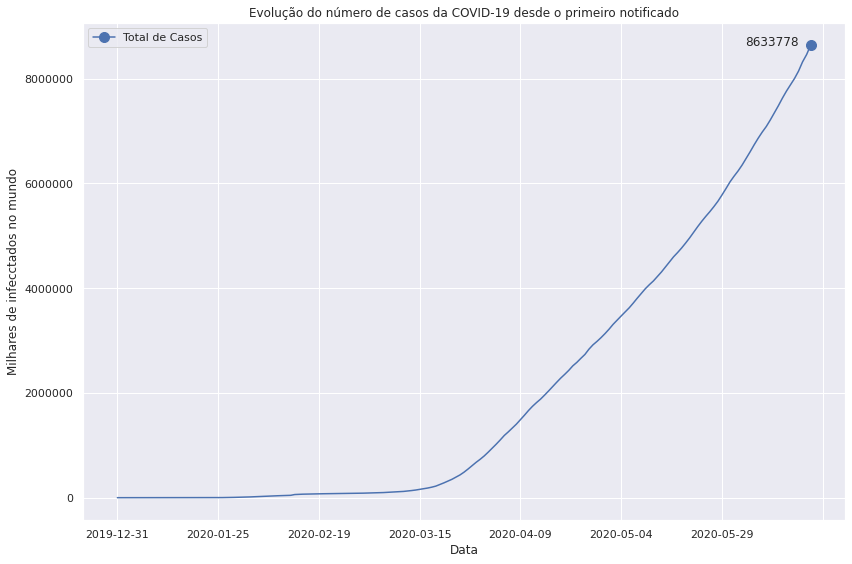

In [201]:
# gráfico de linhas da evolução da covid-19

df_evolucao = df.loc[df['location']=='World',['date', 'total_cases']].set_index('date').copy()



sns.set()
fig, ax = plt.subplots(figsize=(12, 8))

df_evolucao.plot(ax=ax, marker ='o', markevery=[-1], markersize=10,)
ax.set_ylabel("Milhares de infecctados no mundo")
ax.set_xlabel("Data")
ax.set_title("Evolução do número de casos da COVID-19 desde o primeiro notificado")
ax.set_yticklabels(['0', '0', '2000000', '4000000', '6000000', '8000000'])
plt.legend()
ax.text(169, df_evolucao.total_cases[-1], int(df_evolucao.total_cases[-1]), ha='right' )
ax.legend(['Total de Casos'])

plt.tight_layout()


Como proposto, vemos um início com pouca mudança no número de casos. O início da rápida subida no neste número se deu **no mundo** por volta do dia 15/03/2020. A partir deste dia não observamos nenhuma queda na curva e nem indícios de achatamento, ou seja, indícios de que se chegou no topo da curva e vemos que no último dia registrado no *dataset*, 20/06/2020, o número de casos confirmados no mundo era de mais de 8.500.000 casos.

### Analisando Índia e Russia

Como anunciado acima, iremos agora analisar o caso da India e da Russia. Observe que estes dois países aparecem no ranking dos 5 países com maior número de casos (Rússia em terceiro e India em quarto), porém nenhum dos dois aparece no ranking 5 países com maior número de mortes. 

O primeiro procedimento a se fazer é visualizar o número de mortes nesses países para verificar se este número é relaviamente menor que a a maioria dos países.

Lembrando que os dados plotado nos **gráficos de barra** acima são até a data mais recente do *dataset*, 20/06/2020. Portando analisaremos aqui as mortes para Rússia e India até este dia.

In [ ]:
# verificando numero de mortes na russia

df.loc[df['date'] == '2020-06-20'].loc[df['location']=='Russia']

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
18963,RUS,Europe,Russia,2020-06-20,569063.0,7972.0,7972.0,182.0,3899.442,54.627,54.627,1.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145934460,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58


In [ ]:
# verificando numero de mortes na india

df.loc[df['date'] == '2020-06-20'].loc[df['location']=='India']

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
10598,IND,Asia,India,2020-06-20,395048.0,14516.0,12948.0,375.0,286.266,10.519,9.383,0.272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


Como esperado, Índia e Rússia possuem uma quantidade menor de mortes em relação aos países que mais possuem. 

A partir disso podemos levantar algumas hipóteses:

  * Uma possível explicação para isto é o fato desses dois países possuirem grande quantidade de jovens em sua população. Esta parte da população em sua maioria não faz parte do grupo de risco, e por isso a chance de virem a óbito devido à COVID-19 é menor.

  * Outra hipótese é que o bloqueio social e os testes em massa nestes países foram eficientes e funcionaram como o esperado, com a colaboração da população e com a presença constante de órgãos do governo.

  * Uma terceira hipótese que pode se pensar é a não noticação de mortes nesses dois países, seja por parte do governo aos órgãos internacionais, ou pela população às instâncias do governo.


Note que não expus minha opinião sobre o assunto, apenas levantei algumas das hipóteses possíveis para a explicação do fato. Para confirmação de qual, ou quais estão corretas é necessário uma investigação mais profunda que vai além dos dados deste *dataset*.

## Análise Exploratória para o Brasil

Iniciaremos agora uma análise dos dados específica para o Brasil. Aqui observaremos quanto tivemos a primeira morte registrada pela COVID-19 em relação a data de notificação do primeiro caso da COVID-19 registrado aqui, visualizaremos gráficos para mortes totais e casos totais e outras análises mais específicas. 

Os dados utilizados aqui serão os presentes no *dataset* que usamos até agora, porém o gorverno brasileiro possui um site com mapas e gráficos interativos e com atualização diaria. Eles tambem fornecem vários conjunto de dados com extensão `csv` para quem tiver interesse em usa-los. O site se chama [Coronavírus Brasil](https://covid.saude.gov.br/).

### Criando cópia do *dataset*

Vamos inicialmente criar uma cópia do nosso *dataset* principal (df) somente com as informações referentes ao Brasil e ver as 5 primeiras entradas

Para isso utilizaremos a função `copy` para copiar e `head` para as entradas.

In [ ]:
# copiando dados para um novo dataset


df_brasil = df.loc[df['location']=='Brazil'].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3232,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3233,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3234,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3235,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3236,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


### Data da primeira Morte registrada pela COVID-19

Iniciaremos a nossa análise para o Brasil observando qual a data da primeira morte atribuida à COVID-19.

Precisamos desta data, pois ela apoiará as próximas análises.

Para identificarmos isso utilizaremos o método `loc`.


In [ ]:
# vendo dia da primeira morte registrada

df_brasil.loc[df['total_deaths']==1.0]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3310,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Podemos ver que a primeira morte pela COVID-19 registrada no Brasil foi no dia 18/03/2020.

Podemos verificar agora qual a diferença de dias entre este dia da primeira morte notificada no Brasil pela COVID-19 e o dia do primeiro caso da COVID-19 registrado no Brasil. 

In [ ]:
# vendo diferença de dias entre o primeiro caso e a primeira morte no brasil

# data da primeira morte

df_brasil.loc[df['total_deaths']==1.0, ['location', 'date', 'total_deaths']]

,location,date,total_deaths
3310,Brazil,2020-03-18,1.0


In [ ]:
# data do primeiro caso

df_brasil.loc[df['total_cases']==1.0, ['location', 'date', 'total_cases']]

,location,date,total_cases
3289,Brazil,2020-02-26,1.0
3290,Brazil,2020-02-27,1.0
3291,Brazil,2020-02-28,1.0
3292,Brazil,2020-02-29,1.0


Vemos que o primeiro caso da COVID-19 no Brasil foi registrado no dia 26/02/2020, enquanto que a primeira morte foi registrada dia 18/03/2020. 

Portando temos uma diferença de 21 dias entre estas datas.

### Gráfico de linhas em escala linear para Casos e Mortes totais

Como ja dito, conseguimos visualizar melhor e tirar mais insights observando gráfico, por isso agora faremos gráficos de linha em escala linear para número de casso e número de mortes para o Brasil até o dia 20/06/2020.

Posteriormente faremos também gráficos de linhas em escala logarítmica para essas mesmas variáveis.

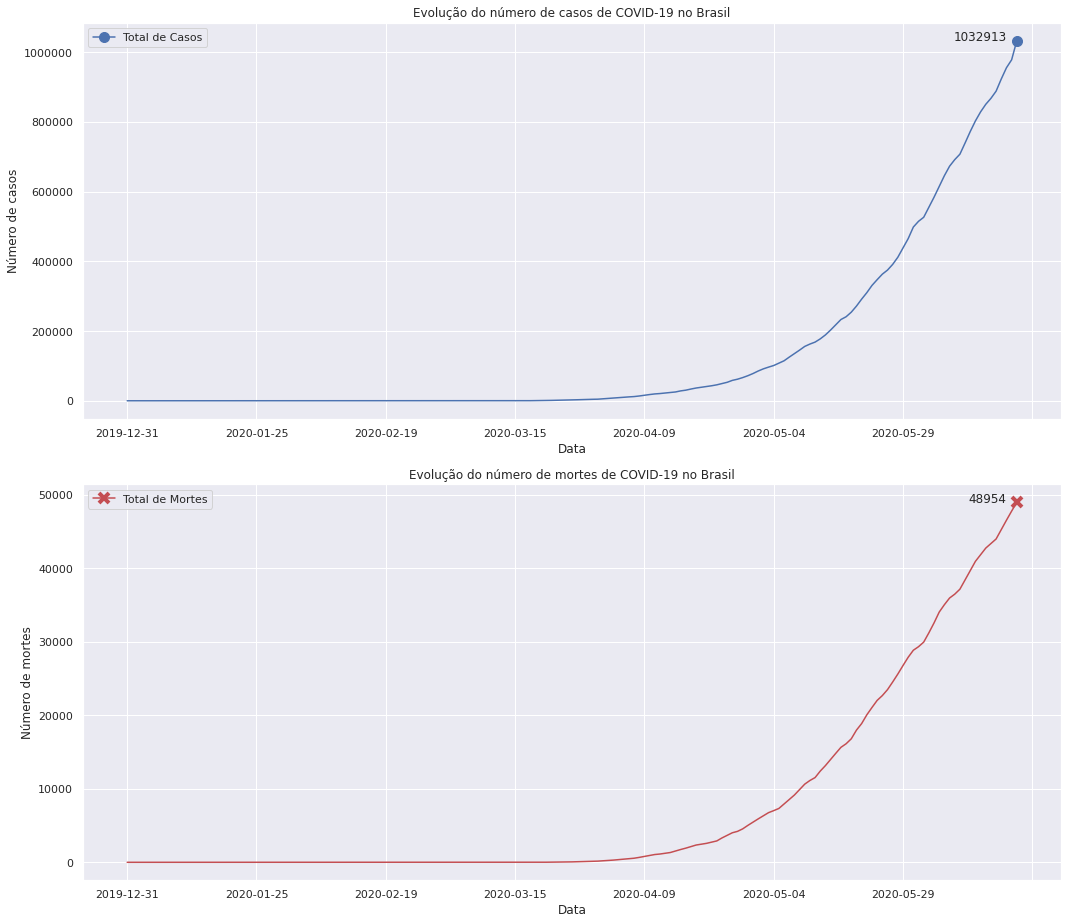

In [196]:
# grafico de linhas escala linear para casos e mortes

df_brasil_casos = df_brasil.loc[df['location']=='Brazil', ['date', 'total_cases']].set_index('date').copy()
df_brasil_mortes = df_brasil.loc[df['location']=='Brazil', ['date', 'total_deaths']].set_index('date').copy()

sns.set()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 13))

df_brasil_casos.plot(ax=ax1, marker ='o', markevery=[-1], markersize=10)
ax1.set_title('Evolução do número de casos de COVID-19 no Brasil')
ax1.set_xlabel('Data')
ax1.set_ylabel('Número de casos')
ax1.set_yticklabels(['0', '0', '200000', '400000', '600000', '800000', '1000000'])
ax1.text(len(df_brasil_casos)-3, df_brasil_casos.total_cases[-1],
         int(df_brasil_casos.total_cases[-1]), ha='right')
ax1.legend(['Total de Casos'])




df_brasil_mortes.plot(ax=ax2, color='r',marker='x', markevery=[-1], markersize=10,
                      markeredgewidth=4)
ax2.set_title('Evolução do número de mortes de COVID-19 no Brasil')
ax2.set_xlabel('Data')
ax2.set_ylabel('Número de mortes')
ax2.text(len(df_brasil_mortes)-3, df_brasil_mortes.total_deaths[-1],
         int(df_brasil_mortes.total_deaths[-1]), ha='right')
ax2.legend(['Total de Mortes'])



plt.tight_layout()

Podemos observar que ambos os gráficos seguem uma curva semelhante. Além disso, eles seguem a tendência do gráfico que mostra a evolução mundial.

Assim como dito para o gráfico mundial, podemos afirmar que em nenhum destes dois é visto qualquer indício de achatamento da curva, ou seja, indício de que se atingiu o topo.

Observando a escala dos dois gráficos vemos que a quantidade de infectados é muito maior que a quantidade de mortes, mesmo essa quantidade de mortes sendo muito expressiva.

### Gráfico de linhas em escala Logarítmica para Casos e Mortes totais

Faremos agora com os mesmos dados usados nos gráficos acima, um gráfico de linhas em escala logarítimica.

Será feito essa mudança de escala para mostrar que realmente o crescimento tanto de casos como de mortes em uma pandemia crescem de forma exponencial.

Em uma escala linear, curvas exponenciais crescentes seguem uma trajetória próxima à essas apresentadas acima. 

Porém, quando mudamos a escala do eixo Y para uma escala logarítimica, essas mesmas curvas exponenciais tendem a serem suavizadas, se aproximando de uma reta. Portanto, para mostrar que, de fato, nas curvas dos gráficos acima nós temos traços de uma função exponencial, mostraremos sua suavização agora em um gráfico em escala logarítimica. 

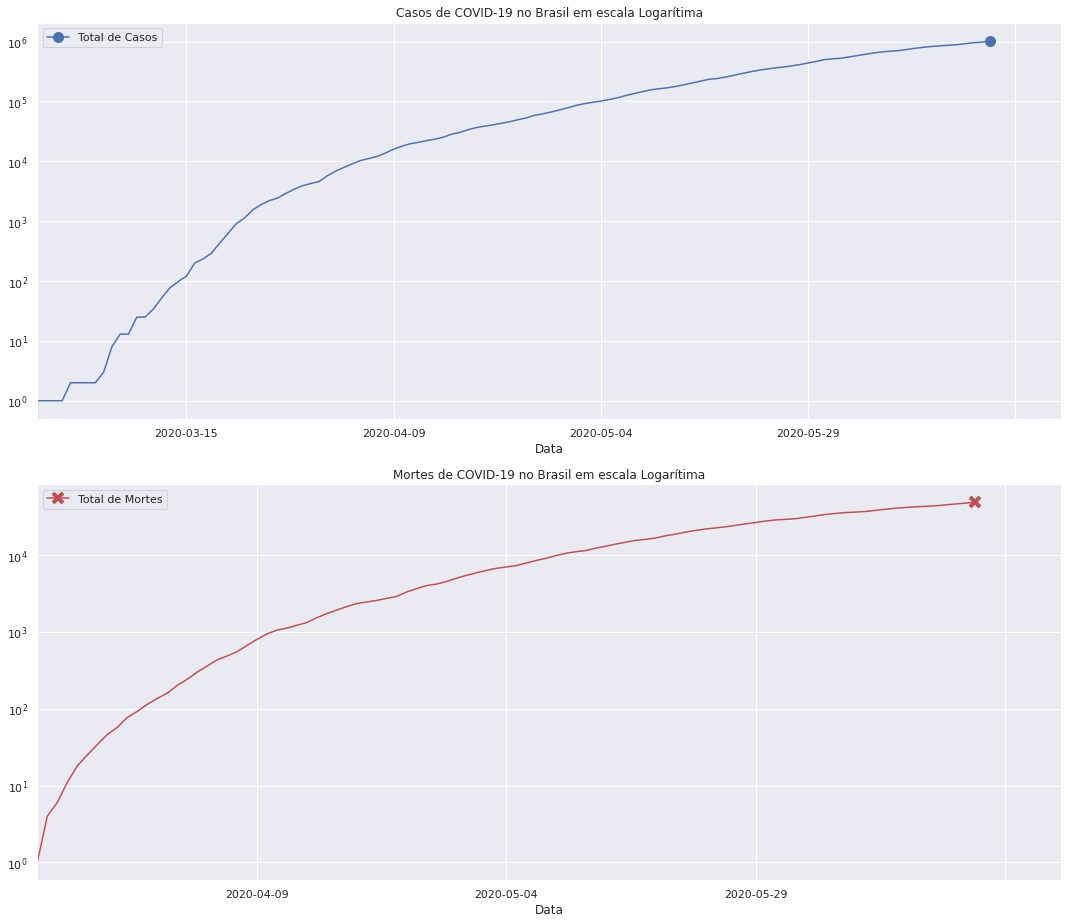

In [195]:
# grafico em escala logaritmica para mortes e casos


sns.set()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 13))

df_brasil_casos.plot(ax=ax1, marker ='o', markevery=[-1], markersize=10)
ax1.set_yscale('log')
ax1.set_xlim(57)
ax1.set_xlabel('Data')
ax1.set_title('Casos de COVID-19 no Brasil em escala Logarítima')
ax1.legend(['Total de Casos'])


df_brasil_mortes.plot(ax=ax2, color='r', marker='x', markevery=[-1], markersize=10,
                      markeredgewidth=4)
ax2.set_yscale('log')
ax2.set_xlim(78)
ax2.set_xlabel('Data')
ax2.set_title('Mortes de COVID-19 no Brasil em escala Logarítima')
ax2.legend(['Total de Mortes'])



plt.tight_layout()

Note que em ambas as curvas não temos a formação de uma reta. Isso ocorre, pois estamos falando de algo real, e não ideal. Temos vários fatores, além do crescimento exponencial, que rege a evolução de uma pandemia. Estes fatores fazem com que essa curva não se torne uma reta de fato.

Porém note que ambas as curvas foram suavizadas em relação aos gráficos lineares. Isso ja nos da indicios de que realmente ambas as curvas possuem traços de exponencialidade.

## Conclusão

É possível concluir, diante dos dados analisados e da situação que todos estão  passando, que a situação é crítica. Como mostrado nos gráficos e tabelas referentes ao Brasil temos mais de 1.000.000 de casos confirmados e aproximadamente 50.000 mortes, sendo o primeiro caso confirmado no dia 26/02/2020.

Considerando o mundo todo temos números ainda maiores. Ao todo, até o dia 20/06/2020 tinhamos mais de 8.500.000 casos confirmados da COVID-19.

Vimos que existe uma peculiaridade com a Russia e a India em relação ao número total de casos e o número total de mortes.

Por fim observamos o comportamento exponencial da curva de evolução de casos e mortes de uma pandemia.

É necessário, em tempos de crise como esse, que todos entendam o peso que os dados aqui apresentadas possuem. São muitos mortos, são muitos casos. 
Se esforçar para nos manter-mos dentro de casa e só sair for extremamente necessário é essencial para superarmos este momento. 

Estudos como este são essenciais para a propagação de conhecimento e contribuição para a resolução do problema o quanto antes. Agradeço muito caso você tenha chegado até aqui, até mais!